In [62]:
import pandas as pd 
import numpy as np
import matplotlib as plt

In [63]:
df = pd.read_csv("/Users/furqaankhan/Desktop/health.csv")

In [64]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [65]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [66]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [67]:
dftwo = df.dropna

In [68]:
dftwo

<bound method DataFrame.dropna of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6

In [69]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
file_path = '/Users/furqaankhan/Desktop/health.csv'  # Replace with your actual file path
sleep_data = pd.read_csv(file_path)

# Convert categorical columns to 'category' data type
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
sleep_data[categorical_columns] = sleep_data[categorical_columns].astype('category')

# Handling Blood Pressure: Splitting into two numerical columns
blood_pressure_split = sleep_data['Blood Pressure'].str.split('/', expand=True)
sleep_data['Systolic BP'] = pd.to_numeric(blood_pressure_split[0])
sleep_data['Diastolic BP'] = pd.to_numeric(blood_pressure_split[1])
sleep_data = sleep_data.drop(['Blood Pressure'], axis=1)  # Drop original column

# Normalize numerical columns using Min-Max normalization
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic BP', 'Diastolic BP']
scaler = MinMaxScaler()
sleep_data[numerical_cols] = scaler.fit_transform(sleep_data[numerical_cols])

# Feature Engineering: Creating Age Groups and categorizing Physical Activity Level
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
sleep_data['Age Group'] = pd.cut(sleep_data['Age'], bins=bins, labels=labels, right=False)
sleep_data['Physical Activity Category'] = pd.cut(sleep_data['Physical Activity Level'], bins=3, labels=['Low', 'Medium', 'High'])

# One-Hot Encoding of Categorical Variables
categorical_columns_for_encoding = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Age Group', 'Physical Activity Category']
sleep_data_encoded = pd.get_dummies(sleep_data, columns=categorical_columns_for_encoding)

# Data Preparation for Prediction Task (Heart Rate)
features_predict = sleep_data_encoded.drop(['Heart Rate'], axis=1)
target_predict = sleep_data_encoded['Heart Rate']

# Splitting the dataset for Prediction Task
X_train_predict, X_test_predict, y_train_predict, y_test_predict = train_test_split(
    features_predict, target_predict, test_size=0.2, random_state=42)

# Data Preparation for Classification Task (Sleep Disorder)
# Assuming 'Sleep Disorder_None' as the target for classification as an example
features_classify = sleep_data_encoded.drop(['Sleep Disorder_None'], axis=1)
target_classify = sleep_data_encoded['Sleep Disorder_None']

# Splitting the dataset for Classification Task
X_train_classify, X_test_classify, y_train_classify, y_test_classify = train_test_split(
    features_classify, target_classify, test_size=0.2, random_state=42)


In [78]:
sleep_data_encoded

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,...,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea,Age Group_20-29,Age Group_30-39,Age Group_40-49,Age Group_50-59,Physical Activity Category_Low,Physical Activity Category_Medium,Physical Activity Category_High
0,1,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,0.407407,0.40,...,0,1,0,0,0,0,0,1,0,0
1,2,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,0.370370,0.25,...,0,1,0,0,0,0,0,0,1,0
2,3,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,0.370370,0.25,...,0,1,0,0,0,0,0,0,1,0
3,4,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,0.925926,0.75,...,0,0,1,0,0,0,0,1,0,0
4,5,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,0.925926,0.75,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1
370,371,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1
371,372,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1
372,373,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1


In [71]:
sleep_data_encoded

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,...,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea,Age Group_20-29,Age Group_30-39,Age Group_40-49,Age Group_50-59,Physical Activity Category_Low,Physical Activity Category_Medium,Physical Activity Category_High
0,1,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,0.407407,0.40,...,0,1,0,0,0,0,0,1,0,0
1,2,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,0.370370,0.25,...,0,1,0,0,0,0,0,0,1,0
2,3,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,0.370370,0.25,...,0,1,0,0,0,0,0,0,1,0
3,4,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,0.925926,0.75,...,0,0,1,0,0,0,0,1,0,0
4,5,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,0.925926,0.75,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1
370,371,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1
371,372,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1
372,373,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1


In [72]:


# Models for Prediction Task
models_predict = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'SVM Regressor': SVR(),
    'KNN Regressor': KNeighborsRegressor()
}

# Models for Classification Task
models_classify = {
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'SVM Classifier': SVC(),
    'KNN Classifier': KNeighborsClassifier()
}

# Training and Evaluating Models for Prediction Task
for name, model in models_predict.items():
    model.fit(X_train_predict, y_train_predict)
    predictions = model.predict(X_test_predict)
    mse = mean_squared_error(y_test_predict, predictions)
    print(f"{name} MSE: {mse}")

# Training and Evaluating Models for Classification Task
for name, model in models_classify.items():
    model.fit(X_train_classify, y_train_classify)
    predictions = model.predict(X_test_classify)
    accuracy = accuracy_score(y_test_classify, predictions)
    print(f"{name} Accuracy: {accuracy}")
    
    
models_classify = {
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'SVM Classifier': SVC(probability=True, random_state=42),
    'KNN Classifier': KNeighborsClassifier()
}



Random Forest Regressor MSE: 0.0013959395313681126
SVM Regressor MSE: 0.03776290810292976
KNN Regressor MSE: 0.02543068783068784
Random Forest Classifier Accuracy: 0.96
SVM Classifier Accuracy: 0.7733333333333333
KNN Classifier Accuracy: 0.8933333333333333


In [73]:
sleep_data_encoded

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,...,Sleep Disorder_Insomnia,Sleep Disorder_None,Sleep Disorder_Sleep Apnea,Age Group_20-29,Age Group_30-39,Age Group_40-49,Age Group_50-59,Physical Activity Category_Low,Physical Activity Category_Medium,Physical Activity Category_High
0,1,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,0.407407,0.40,...,0,1,0,0,0,0,0,1,0,0
1,2,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,0.370370,0.25,...,0,1,0,0,0,0,0,0,1,0
2,3,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,0.370370,0.25,...,0,1,0,0,0,0,0,0,1,0
3,4,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,0.925926,0.75,...,0,0,1,0,0,0,0,1,0,0
4,5,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,0.925926,0.75,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1
370,371,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1
371,372,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1
372,373,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.925926,1.00,...,0,0,1,0,0,0,0,0,0,1


In [74]:
# Training each model in the classification task
for name, model in models_classify.items():
    model.fit(X_train_classify, y_train_classify)


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming models_classify is your dictionary of models
# Train each model
for name, model in models_classify.items():
    model.fit(X_train_classify, y_train_classify)

# Initialize a dictionary to store performance metrics
performance_metrics = {}

# Evaluate each model
for name, model in models_classify.items():
    # Predict on the test set
    y_pred = model.predict(X_test_classify)

    # Calculate metrics and store them in the dictionary
    performance_metrics[name] = {
        'Confusion Matrix': confusion_matrix(y_test_classify, y_pred),
        'Accuracy': accuracy_score(y_test_classify, y_pred),
        'Precision': precision_score(y_test_classify, y_pred, average='macro'),
        'Recall': recall_score(y_test_classify, y_pred, average='macro'),
        'F1 Score': f1_score(y_test_classify, y_pred, average='macro')
    }

# Create a DataFrame from the performance metrics
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Display the comparison table
print(performance_df)


                            Confusion Matrix  Accuracy  Precision    Recall  \
Random Forest Classifier  [[29, 3], [0, 43]]  0.960000   0.967391  0.953125   
SVM Classifier            [[23, 9], [8, 35]]  0.773333   0.768695  0.766352   
KNN Classifier            [[26, 6], [2, 41]]  0.893333   0.900456  0.882994   

                          F1 Score  
Random Forest Classifier  0.958556  
SVM Classifier            0.767378  
KNN Classifier            0.888889  


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dictionary to store regression metrics
regression_metrics = {}

# Training and Evaluating Models for Prediction Task
for name, model in models_predict.items():
    model.fit(X_train_predict, y_train_predict)
    predictions = model.predict(X_test_predict)

    mse = mean_squared_error(y_test_predict, predictions)
    mae = mean_absolute_error(y_test_predict, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_predict, predictions)

    regression_metrics[name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    }

# Display the regression metrics for each model
for model_name, metrics in regression_metrics.items():
    print(f"Metrics for {model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"    {metric_name}: {metric_value}")


Metrics for Random Forest Regressor:
    MSE: 0.0013959395313681126
    MAE: 0.011206349206349548
    RMSE: 0.037362274172862024
    R2 Score: 0.9688876684636116
Metrics for SVM Regressor:
    MSE: 0.03776290810292976
    MAE: 0.1371990547794264
    RMSE: 0.1943268074737239
    R2 Score: 0.15835027930970247
Metrics for KNN Regressor:
    MSE: 0.02543068783068784
    MAE: 0.07644444444444445
    RMSE: 0.1594700217303799
    R2 Score: 0.43320754716981125


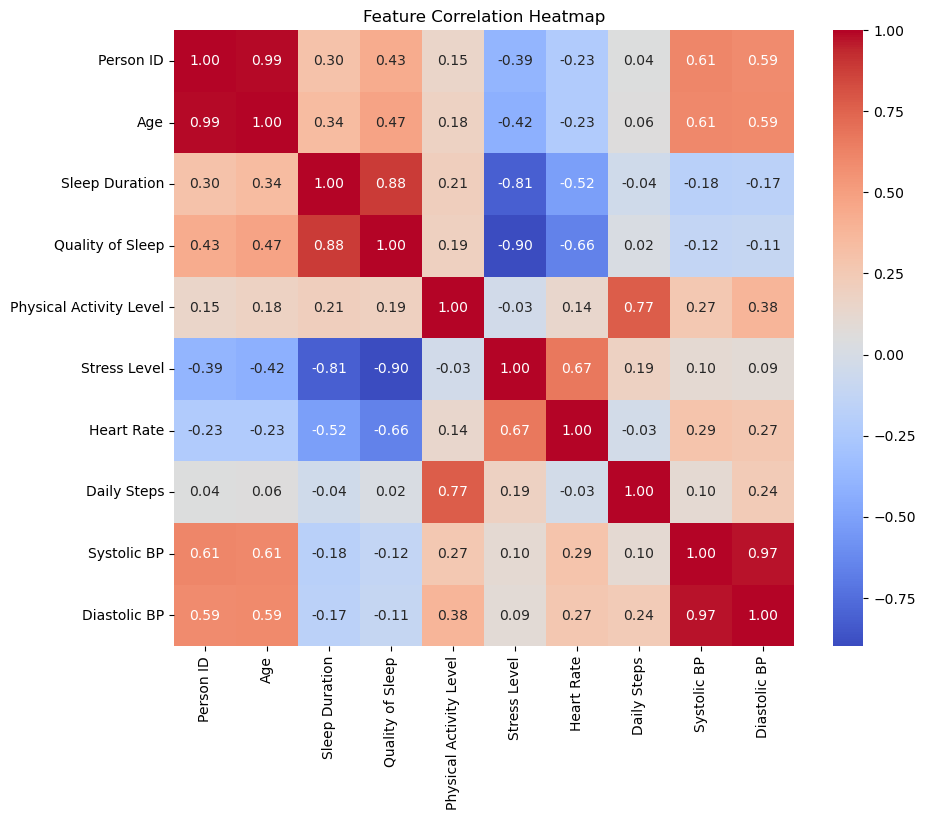

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
corr = sleep_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


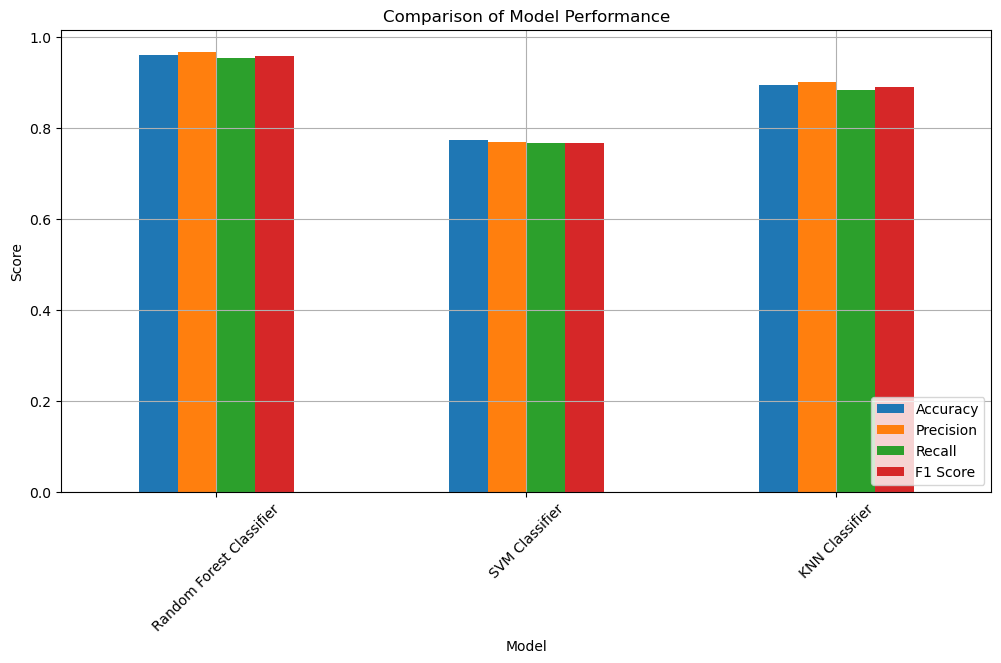

In [59]:
import matplotlib.pyplot as plt

# Assuming performance_df contains columns: 'Accuracy', 'Precision', 'Recall', 'F1 Score'
performance_metrics = performance_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']]

# Plotting
performance_metrics.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


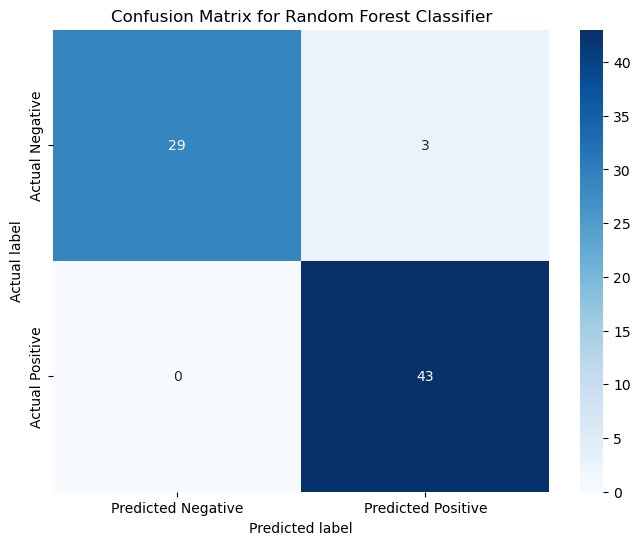

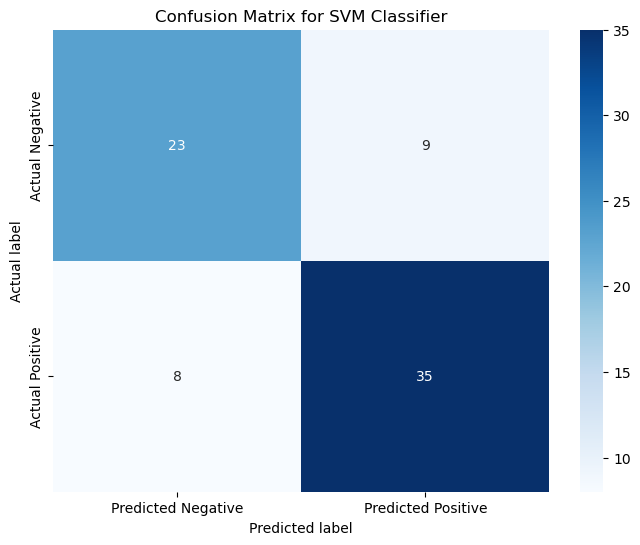

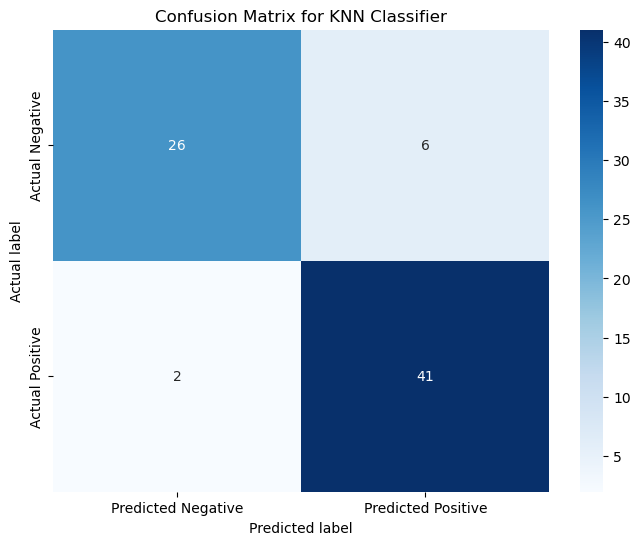

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through the models and their confusion matrices
for model_name, metrics in performance_metrics.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt="d", cmap='Blues', 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


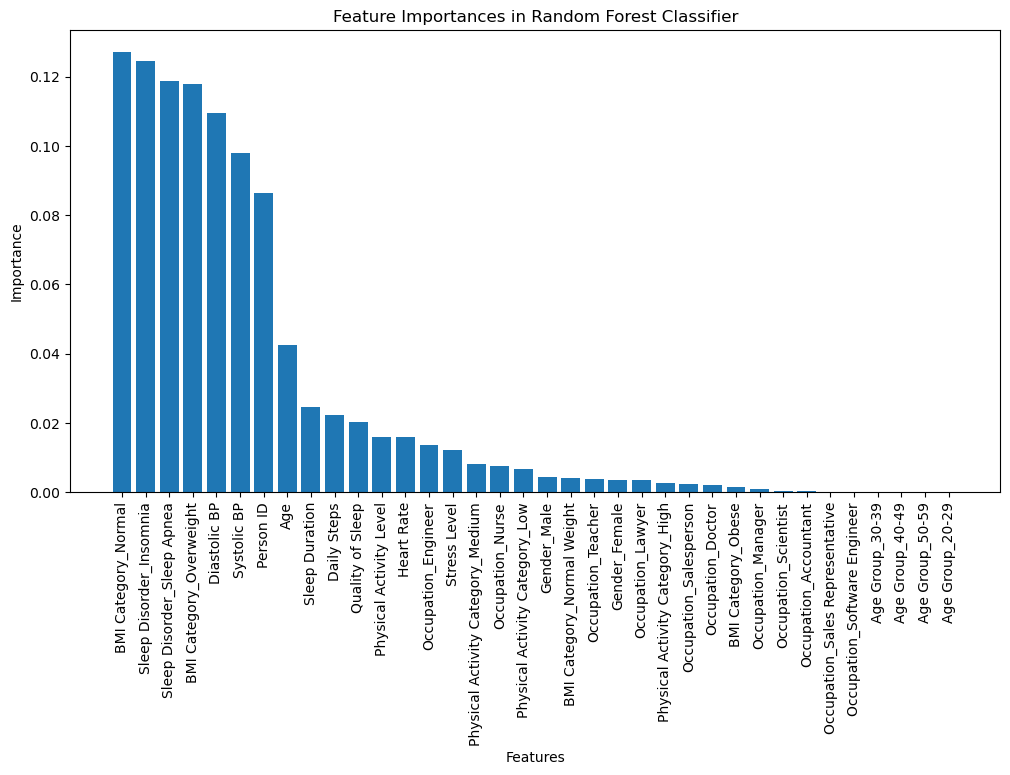

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Random Forest Classifier' is the name of your Random Forest model in models_classify
feature_importances = models_classify['Random Forest Classifier'].feature_importances_

# Sorting the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Creating labels for the features with their corresponding importances
labels = X_train_classify.columns[sorted_idx]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(X_train_classify.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X_train_classify.shape[1]), labels, rotation=90)
plt.title('Feature Importances in Random Forest Classifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


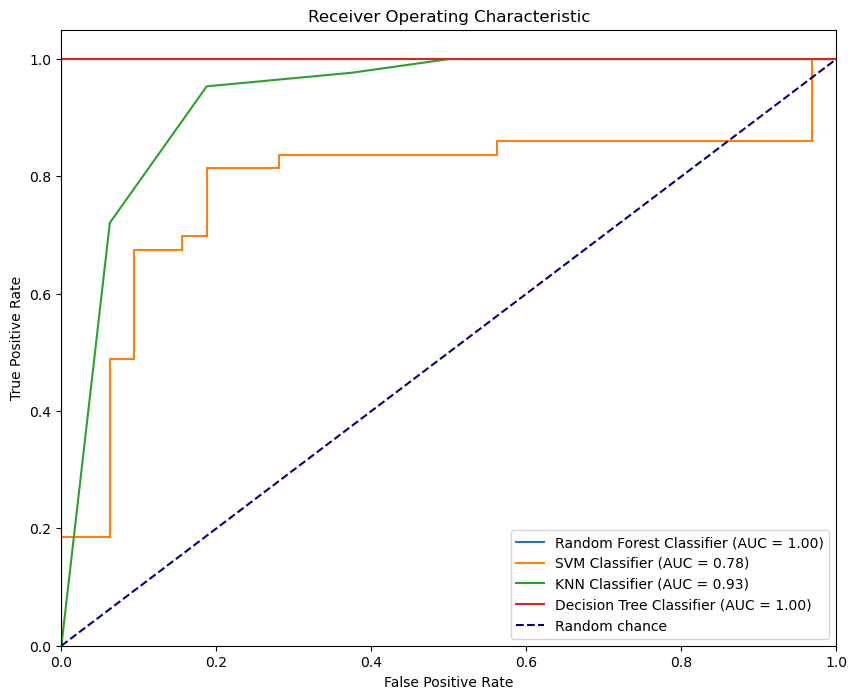

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Plot ROC Curve for each model
plt.figure(figsize=(10, 8))

for name, model in models_classify.items():
    # Predict probabilities
    probas = model.predict_proba(X_test_classify)

    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_classify, probas[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


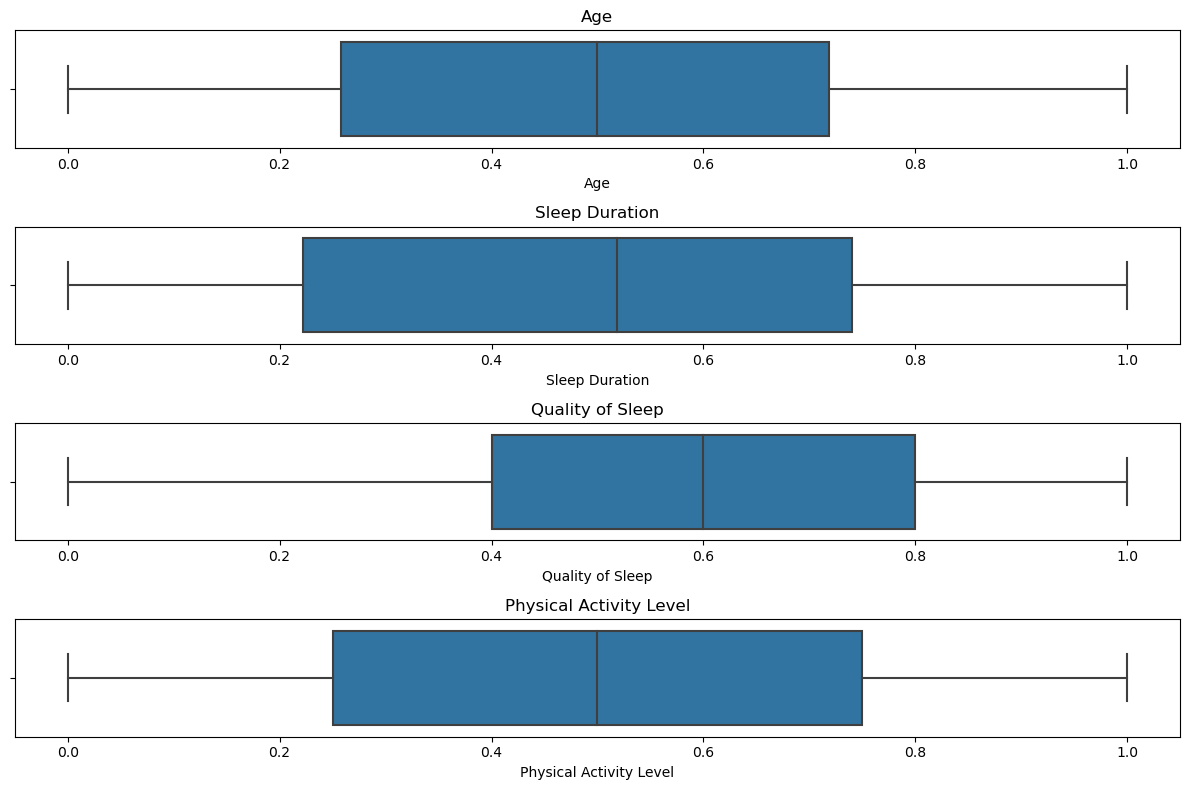

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a few features for box plots
selected_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level']

# Creating box plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(len(selected_features), 1, i+1)
    sns.boxplot(x=sleep_data[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()


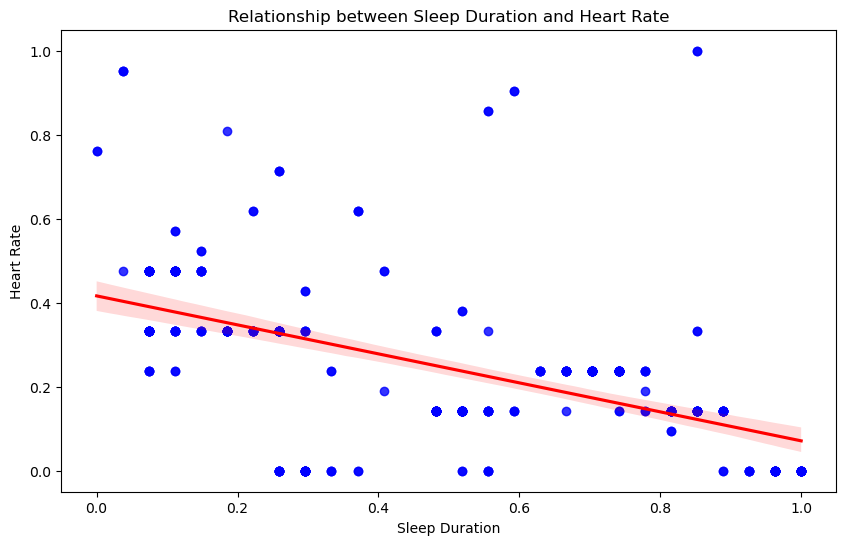

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting two features to visualize
feature_x = 'Sleep Duration'
feature_y = 'Heart Rate'

# Creating scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=sleep_data[feature_x], y=sleep_data[feature_y], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title(f'Relationship between {feature_x} and {feature_y}')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()


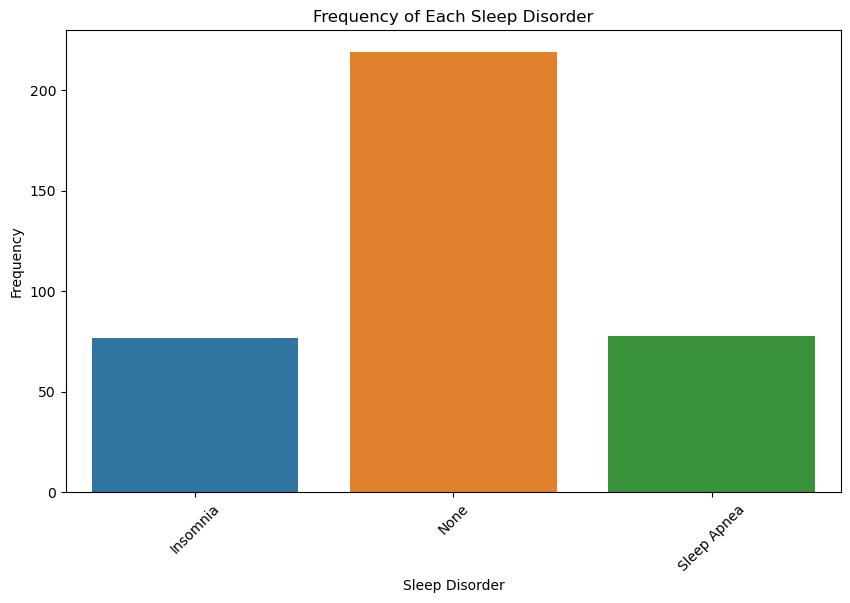

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the frequency of each sleep disorder
sleep_disorder_counts = sleep_data['Sleep Disorder'].value_counts()

# Creating a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sleep_disorder_counts.index, y=sleep_disorder_counts.values)
plt.title('Frequency of Each Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


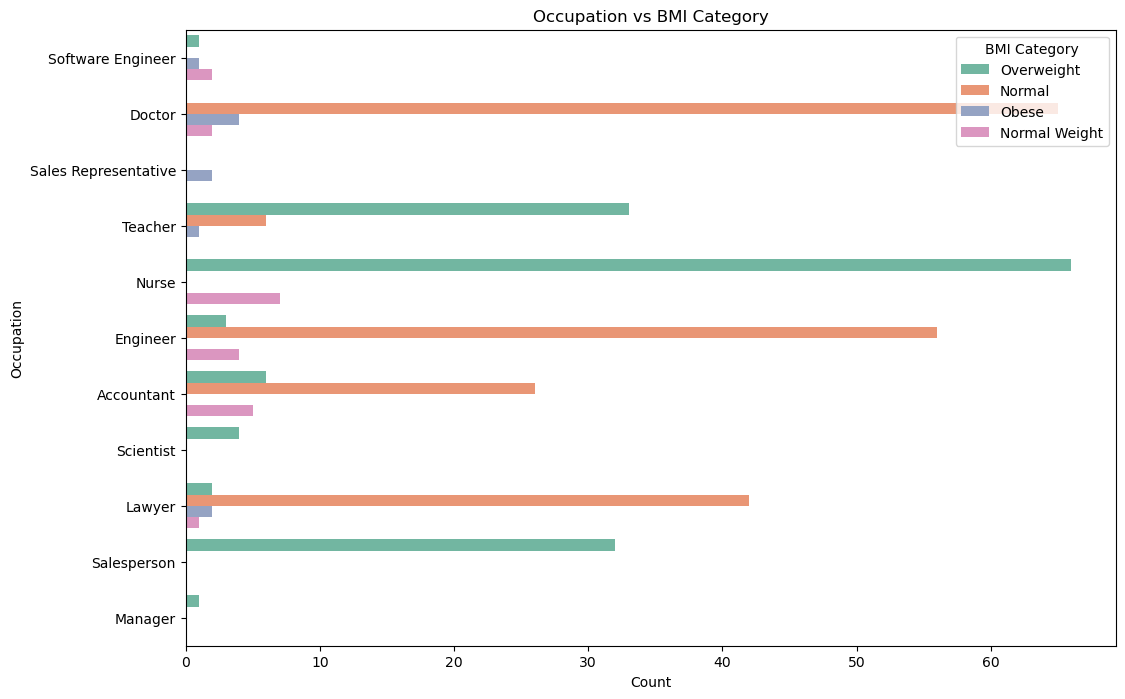

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Occupation', hue='BMI Category', data=df, palette='Set2')
plt.title('Occupation vs BMI Category')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='BMI Category', loc='upper right')
plt.show()


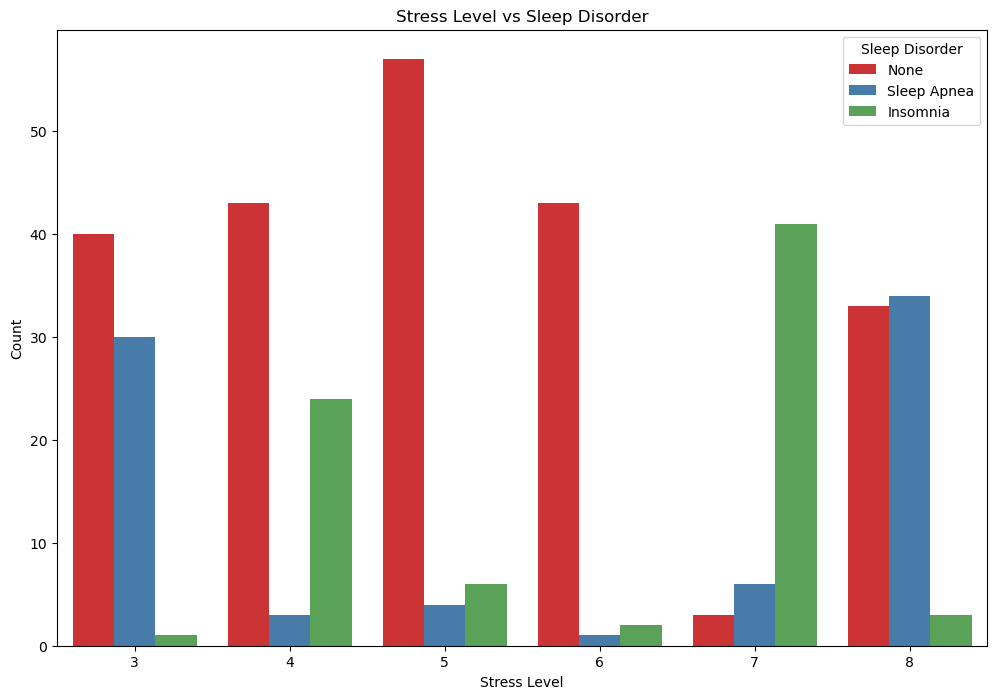

In [34]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Stress Level', hue='Sleep Disorder', data=df, palette='Set1')
plt.title('Stress Level vs Sleep Disorder')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder', loc='upper right')
plt.show()

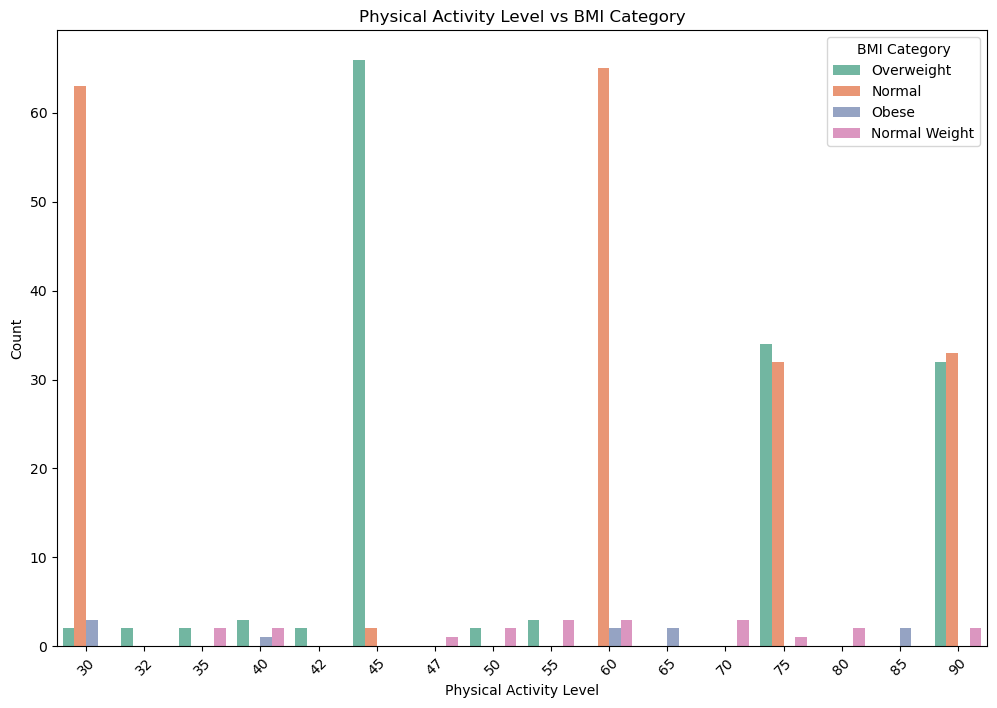

In [35]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Physical Activity Level', hue='BMI Category', data=df, palette='Set2')
plt.title('Physical Activity Level vs BMI Category')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.legend(title='BMI Category', loc='upper right')
plt.xticks(rotation=45)
plt.show()


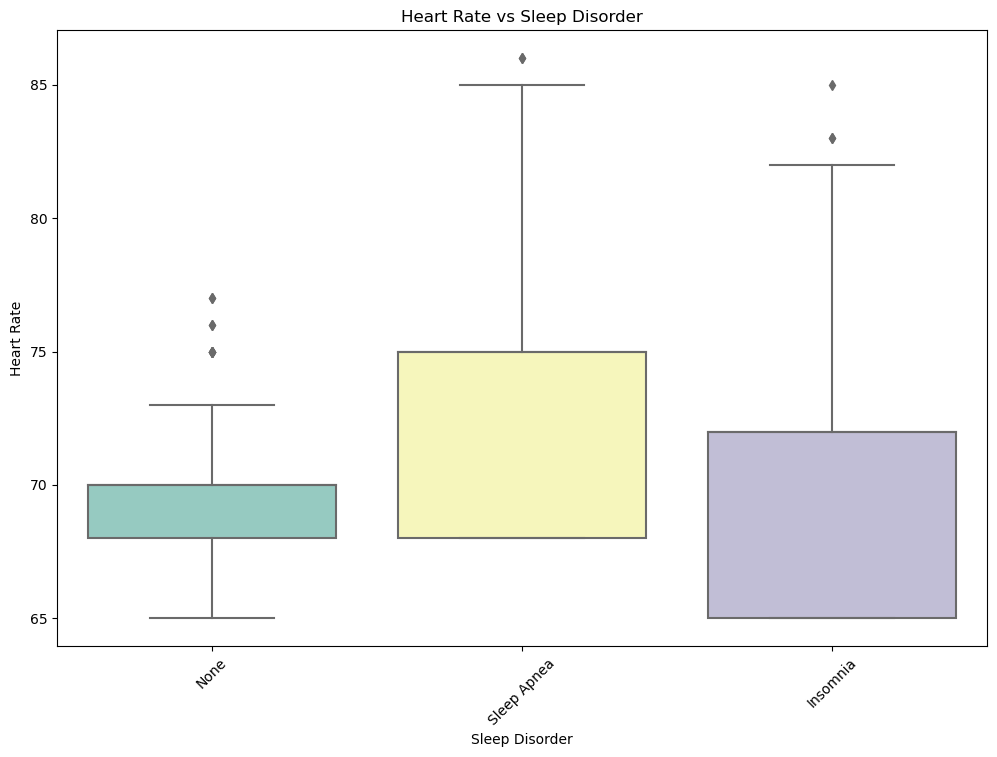

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df, palette='Set3')
plt.title('Heart Rate vs Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45)
plt.show()


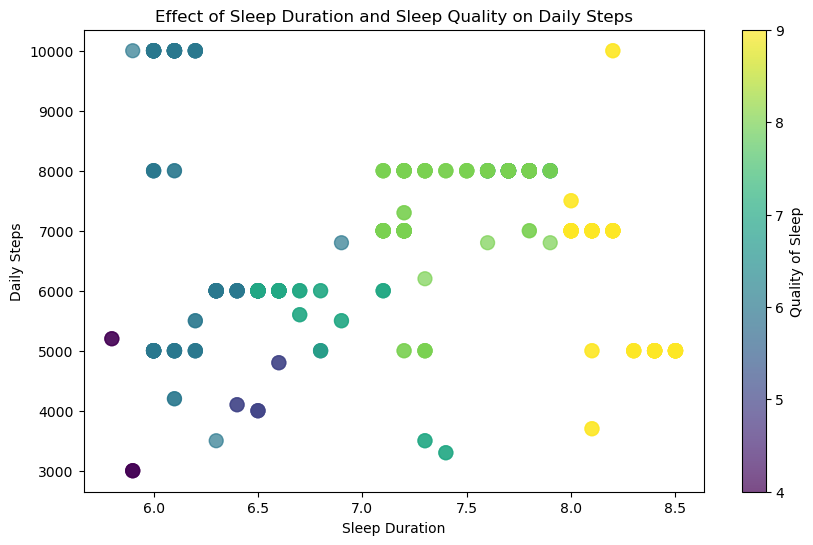

In [38]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['Sleep Duration'],
    df['Daily Steps'],
    c=df['Quality of Sleep'],  # Representing sleep quality by color
    cmap='viridis',           # Color map for different values of sleep quality
    alpha=0.7,                # Transparency of the points
    s=100                     # Size of the points
)

# Adding axis labels and title
plt.xlabel('Sleep Duration')
plt.ylabel('Daily Steps')
plt.title('Effect of Sleep Duration and Sleep Quality on Daily Steps')

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Quality of Sleep')

# Show plot
plt.show()

In [42]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/Users/furqaankhan/Desktop/health.csv'
sleep_datatwo = pd.read_csv(file_path)

# Preprocessing the data
# Convert categorical columns to numeric using label encoding
label_encoders = {}
for column in sleep_datatwo.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    sleep_datatwo[column] = label_encoders[column].fit_transform(sleep_datatwo[column])

# Define the features and the target
X = sleep_datatwo.drop('Sleep Disorder', axis=1)  # Features
y = sleep_datatwo['Sleep Disorder']  # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
accuracy


0.9066666666666666

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a classification report to get other performance metrics
class_report = classification_report(y_test, y_pred, output_dict=True)

# Display the confusion matrix and classification report
conf_matrix, class_report


(array([[13,  1,  2],
        [ 0, 43,  0],
        [ 3,  1, 12]]),
 {'0': {'precision': 0.8125,
   'recall': 0.8125,
   'f1-score': 0.8125,
   'support': 16},
  '1': {'precision': 0.9555555555555556,
   'recall': 1.0,
   'f1-score': 0.9772727272727273,
   'support': 43},
  '2': {'precision': 0.8571428571428571,
   'recall': 0.75,
   'f1-score': 0.7999999999999999,
   'support': 16},
  'accuracy': 0.9066666666666666,
  'macro avg': {'precision': 0.8750661375661376,
   'recall': 0.8541666666666666,
   'f1-score': 0.8632575757575758,
   'support': 75},
  'weighted avg': {'precision': 0.904042328042328,
   'recall': 0.9066666666666666,
   'f1-score': 0.9043030303030304,
   'support': 75}})